# Import sources

In [1]:
import pandas as pd 
import re #expression régulière 
import nltk #traitement naturel symbolique et statistique du langage anglais
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

nltk.download('stopwords')
nltk.download('wordnet')


df = pd.read_excel("data.xlsx")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arianemailanandam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arianemailanandam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head()


,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description
0,17167919,2017-04-25,3264223,2018-01-03,"['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G0...","['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...","<!-- EPO <DP n=""18""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."
1,17166775,2017-04-18,3235458,2017-10-25,"['A61B17-68', 'A61B17-888', 'A61B17-8685', 'A6...","['A61B17-88', 'A61B17-68', 'A61B17-86']","<!-- EPO <DP n=""20""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">FIE..."
2,17166069,2017-04-11,3249094,2017-11-29,"['D06F58-206', 'D06F58-20']","['D06F58-20', 'D06F58-02']","<!-- EPO <DP n=""22""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
3,18771363,2018-03-05,3605724,2020-02-05,"['H01P1-2138', 'H01P5-107', 'H01P1-2088', 'H01...","['H01P3-12', 'H01P1-213', 'H01P5-107']","<!-- EPO <DP n=""62""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">Tec..."
4,19881950,2019-11-01,3713245,2020-09-23,"['H04N21-4345', 'H04N21-4821', 'H04N21-4316']","['H04N21-482', 'H04N21-262']","<!-- EPO <DP n=""14""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."


In [3]:
df.columns
df.dtypes #Normalement pas besoin de faire des conversions 

Numéro d'application              int64
Date d'application       datetime64[ns]
Numero de publication             int64
date de publication      datetime64[ns]
CPC                              object
IPC                              object
claim                            object
description                      object
dtype: object

In [4]:
#Des valeurs manquantes ?
print(df.isnull().sum())

#Pas de valeur manquante 

Numéro d'application     0
Date d'application       0
Numero de publication    0
date de publication      0
CPC                      0
IPC                      0
claim                    0
description              0
dtype: int64


In [5]:
#Supprimer les doublons 
df = df.drop_duplicates()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum()) #pas de doublons


Nombre de doublons : 0


# Tokenisation et lemmatisation

In [6]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Enlever les caractères spéciaux
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\s+', ' ', text)  # Enlever les espaces multiples
    return text

df['claim_clean'] = df['claim'].apply(clean_text)
df['description_clean'] = df['description'].apply(clean_text)


lemmatizer = WordNetLemmatizer() #réduit les mots, ex: running -> run
stop_words = set(stopwords.words('english')) #supp les mots inutiles comme "the" "and"

def preprocess_text(text):
    words = text.split()  # Tokenisation
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatisation et suppression des stopwords
    return ' '.join(words) #puis reconstitue en une phrase 

df['claim_processed'] = df['claim_clean'].apply(preprocess_text)
df['description_processed'] = df['description_clean'].apply(preprocess_text)


print(df[['claim', 'claim_processed']].head())
print(df[['description', 'description_processed']].head())




                                               claim  \
0  <!-- EPO <DP n="18"> --><claim id="c-en-0001" ...   
1  <!-- EPO <DP n="20"> --><claim id="c-en-0001" ...   
2  <!-- EPO <DP n="22"> --><claim id="c-en-0001" ...   
3  <!-- EPO <DP n="62"> --><claim id="c-en-0001" ...   
4  <!-- EPO <DP n="14"> --><claim id="c-en-0001" ...   

                                     claim_processed  
0  epo dp n 18 claim id c en 0001 num 0001 claim ...  
1  epo dp n 20 claim id c en 0001 num 0001 claim ...  
2  epo dp n 22 claim id c en 0001 num 0001 claim ...  
3  epo dp n 62 claim id c en 0001 num 0001 claim ...  
4  epo dp n 14 claim id c en 0001 num 0001 claim ...  
                                         description  \
0  <!-- EPO <DP n="1"> --><p id="p0001" num="0001...   
1  <!-- EPO <DP n="1"> --><heading id="h0001">FIE...   
2  <!-- EPO <DP n="1"> --><heading id="h0001"><b>...   
3  <!-- EPO <DP n="1"> --><heading id="h0001">Tec...   
4  <!-- EPO <DP n="1"> --><p id="p0001" num="0001... 

# IPC et CPC

0    ['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...
1              ['A61B17-88', 'A61B17-68', 'A61B17-86']
2                           ['D06F58-20', 'D06F58-02']
3               ['H01P3-12', 'H01P1-213', 'H01P5-107']
4                         ['H04N21-482', 'H04N21-262']
Name: IPC, dtype: object
[<class 'str'>]
0        [C, H, G, B, B, B]
1                 [A, A, A]
2                    [D, D]
3                 [H, H, H]
4                    [H, H]
                ...        
49995          [C, C, C, A]
49996          [B, B, B, B]
49997          [C, C, A, A]
49998          [H, H, G, G]
49999       [F, B, B, B, B]
Name: IPC_first_letter, Length: 50000, dtype: object


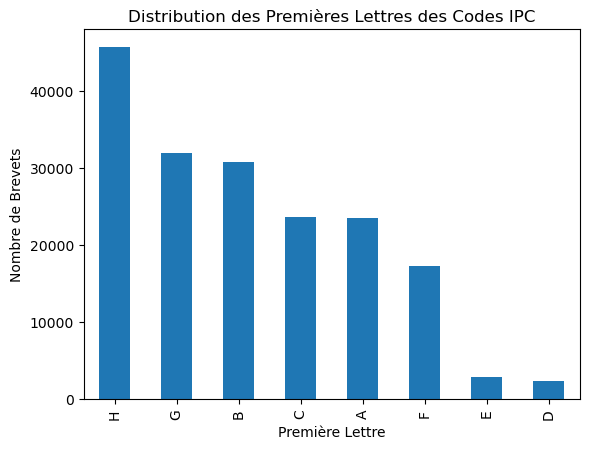

In [7]:
#IPC
#df['IPC']

#Extraire la première lettre 
print(df['IPC'].head())
print(df['IPC'].apply(type).unique())

def extract_first_letter(ipc_codes):
    #Transformer en liste la chaine de caractère 
    try:
        ipc_codes = eval(ipc_codes)
    except:
        return []

    if isinstance(ipc_codes, list):  # Vérifier que c'est bien une liste
        return [code[0] for code in ipc_codes if isinstance(code, str)]  # Vérifier que chaque élément est une chaîne
    return []

# créa de la colonne IPC avec la première lettre 
df['IPC_first_letter'] = df['IPC'].apply(extract_first_letter)
print(df['IPC_first_letter'])

ipc_first_letter_counts = df['IPC_first_letter'].explode().value_counts()

# dist de IPC
ipc_first_letter_counts.plot(kind='bar')
plt.title('Distribution des Premières Lettres des Codes IPC')
plt.xlabel('Première Lettre')
plt.ylabel('Nombre de Brevets')
plt.show()




0    ['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G0...
1    ['A61B17-68', 'A61B17-888', 'A61B17-8685', 'A6...
2                          ['D06F58-206', 'D06F58-20']
3    ['H01P1-2138', 'H01P5-107', 'H01P1-2088', 'H01...
4        ['H04N21-4345', 'H04N21-4821', 'H04N21-4316']
Name: CPC, dtype: object
[<class 'str'>]
0                    [B, H, B, G, G, G, G, B, B, B, B, G]
1                             [A, A, A, A, A, A, A, A, A]
2                                                  [D, D]
3                                         [H, H, H, H, H]
4                                               [H, H, H]
                               ...                       
49995                   [C, A, A, A, A, A, A, A, A, A, A]
49996                                           [B, B, B]
49997    [C, C, A, C, C, C, C, C, C, C, C, C, C, C, C, A]
49998                         [H, G, H, G, G, G, H, G, H]
49999                         [F, B, B, B, B, B, B, B, Y]
Name: CPC_first_letter, Length: 50000, dtype: 

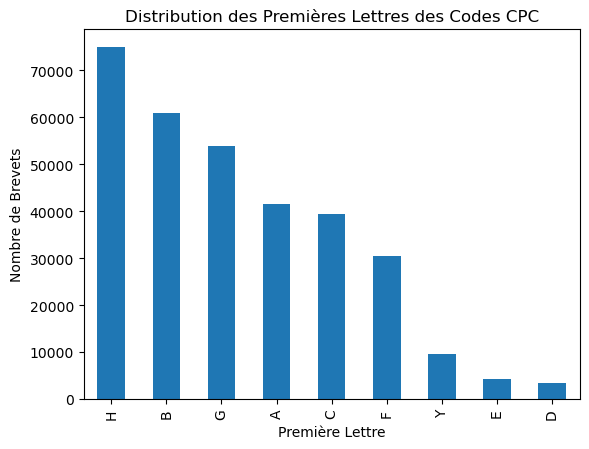

In [8]:
#CPC

#Extraire la première lettre 
print(df['CPC'].head())
print(df['CPC'].apply(type).unique())

def extract_first_letter(cpc_codes):
    #Transformer en liste la chaine de caractère 
    try:
        cpc_codes = eval(cpc_codes)
    except:
        return []

    if isinstance(cpc_codes, list):  # Vérifier que c'est bien une liste
        return [code[0] for code in cpc_codes if isinstance(code, str)]  # Vérifier que chaque élément est une chaîne
    return []

# créa de la colonne 1 letter cpc 
df['CPC_first_letter'] = df['CPC'].apply(extract_first_letter)
print(df['CPC_first_letter'])

cpc_first_letter_counts = df['CPC_first_letter'].explode().value_counts()

# la dist des CPC
cpc_first_letter_counts.plot(kind='bar')
plt.title('Distribution des Premières Lettres des Codes CPC')
plt.xlabel('Première Lettre')
plt.ylabel('Nombre de Brevets')
plt.show()

In [9]:
#ipc on va essayer de prendre juste les 4premiers caractères des variables de la colonne IPC -> demander aux autres 

#fusion de la colonne claim et description pour faciliter l'analyse par la suite 
df['claim_description'] = df.apply(lambda row: row['claim_processed'] + ' ' + row['description_processed'], axis=1)
df.head()

#on peut supp les colonnes : claim, description, claim_clean, description_clean, claim_processed, description_processed à confirmer avec harish 
df = df.drop(['claim', 'description', 'claim_clean', 'description_clean', 'claim_processed', 'description_processed'], axis=1)
df.head()

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,IPC_first_letter,CPC_first_letter,claim_description
0,17167919,2017-04-25,3264223,2018-01-03,"['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G0...","['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...","[C, H, G, B, B, B]","[B, H, B, G, G, G, G, B, B, B, B, G]",epo dp n 18 claim id c en 0001 num 0001 claim ...
1,17166775,2017-04-18,3235458,2017-10-25,"['A61B17-68', 'A61B17-888', 'A61B17-8685', 'A6...","['A61B17-88', 'A61B17-68', 'A61B17-86']","[A, A, A]","[A, A, A, A, A, A, A, A, A]",epo dp n 20 claim id c en 0001 num 0001 claim ...
2,17166069,2017-04-11,3249094,2017-11-29,"['D06F58-206', 'D06F58-20']","['D06F58-20', 'D06F58-02']","[D, D]","[D, D]",epo dp n 22 claim id c en 0001 num 0001 claim ...
3,18771363,2018-03-05,3605724,2020-02-05,"['H01P1-2138', 'H01P5-107', 'H01P1-2088', 'H01...","['H01P3-12', 'H01P1-213', 'H01P5-107']","[H, H, H]","[H, H, H, H, H]",epo dp n 62 claim id c en 0001 num 0001 claim ...
4,19881950,2019-11-01,3713245,2020-09-23,"['H04N21-4345', 'H04N21-4821', 'H04N21-4316']","['H04N21-482', 'H04N21-262']","[H, H]","[H, H, H]",epo dp n 14 claim id c en 0001 num 0001 claim ...


In [10]:
#est un outil puissant pour l'analyse, la transformation et la manipulation de code source Python. Elle est particulièrement utile pour les tâches qui nécessitent une compréhension approfondie de la structure syntaxique du code.


#on se concentre sur CPC et on se base 2 niveaux donc les 3 premiers caractères du CPC

#comme CPC est de type object donc chaine de caractère il faut qu'on le convertisse en liste pour recup les 3 prem carac
def convert_list(cpc_string):
    try:
        return ast.literal_eval(cpc_string)
    except:
        return []
    
df['CPC'] = df['CPC'].apply(convert_list)

#On extrait les 3 prem carac + supp les doublons 
def extract_three_first_carac(cpc_codes):
    if isinstance(cpc_codes, list):
        cpc_three_car = [code[:3] for code in cpc_codes]
        return list(set(cpc_three_car)) #suppression des doublons 
  
    else:
        return []

df['CPC_three_car'] = df['CPC'].apply(extract_three_first_carac)
print(df[['CPC', 'CPC_three_car']])

                                                     CPC  \
0      [B23K26-361, H04M1-0266, B23K26-402, G06F1-162...   
1      [A61B17-68, A61B17-888, A61B17-8685, A61B17-86...   
2                                [D06F58-206, D06F58-20]   
3      [H01P1-2138, H01P5-107, H01P1-2088, H01P5-182,...   
4                [H04N21-4345, H04N21-4821, H04N21-4316]   
...                                                  ...   
49995  [C09D7-63, A61Q3-02, A61K8-40, A61K8-042, A61K...   
49996                   [B60R7-02, B60R5-04, B65D5-2014]   
49997  [C07K16-46, C07K16-2863, A61P35-00, C07K16-280...   
49998  [H04W4-80, G07F11-62, H04B5-79, G07F9-026, G07...   
49999  [F01D25-002, B08B3-003, B01F23-235, B01F25-313...   

                   CPC_three_car  
0           [G02, H04, B23, G06]  
1                          [A61]  
2                          [D06]  
3                          [H01]  
4                          [H04]  
...                          ...  
49995                 [C09, A61]  